# Importation

In [1]:
import pandas as pd
import ast
# Création du barplot
import seaborn as sns
import matplotlib.pyplot as plt
#WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Set stop words for English
stop_words = set(stopwords.words('english'))

# Recupération des données

In [2]:

# Lecture du fichier CSV
ratingdf = pd.read_csv('Books_rating_t.csv')
datadf = pd.read_csv('books_data_t.csv')

# Fonction utilitaire

In [3]:
def unwindColumns(df,columnsToUnwind):
    resdf = df
    for col in columnsToUnwind:
        resdf[col] = resdf[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)
        resdf = resdf.explode(col)
    return resdf

In [4]:
# Remove stop words
def remove_stop_words(text):
    tokens = word_tokenize(text)  # Tokenize the text
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)  # Join tokens back into a string

# Exploration des données

In [5]:
ratingdf.head(2)

,Id,Titre,Prix,User_id,Nom lecteur,revue/utilité,revue/score,revue/heure,revue/résumé,revue/texte
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...


In [6]:
datadf.head(2)

,Titre,Description,Auteurs,Image,Lien Google,Editeur,Date publication,infoLink,Genre,Nb scores
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,01/01/2005,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN


In [7]:
GenreDF = unwindColumns(datadf,['Genre'])
print(GenreDF['Genre'].value_counts().to_csv("temp.csv"))

None


# Preparation des donnée

In [5]:
print(ratingdf.isnull().sum())
ratingdf = ratingdf.dropna(subset=['Titre'])
print(ratingdf.isnull().sum())
print(datadf.isnull().sum())
datadf = datadf.dropna(subset=['Titre'])
print(datadf.isnull().sum())


Id                     0
Titre                208
Prix             2518829
User_id           561787
Nom lecteur       561886
revue/utilité          0
revue/score            0
revue/heure            0
revue/résumé          38
revue/texte            8
dtype: int64
Id                     0
Titre                  0
Prix             2518628
User_id           561774
Nom lecteur       561873
revue/utilité          0
revue/score            0
revue/heure            0
revue/résumé          38
revue/texte            8
dtype: int64
Titre                    1
Description          68442
Auteurs              31413
Image                52075
Lien Google          23836
Editeur              75886
Date publication     25305
infoLink             23836
Genre                41199
Nb scores           162652
dtype: int64
Titre                    0
Description          68441
Auteurs              31413
Image                52075
Lien Google          23836
Editeur              75885
Date publication     25305
in

In [6]:
merged_df = pd.merge(ratingdf, datadf, on='Titre')
merged_df.shape
merged_df.head(2)

,Id,Titre,Prix,User_id,Nom lecteur,revue/utilité,revue/score,revue/heure,revue/résumé,revue/texte,Description,Auteurs,Image,Lien Google,Editeur,Date publication,infoLink,Genre,Nb scores
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,01/01/2005,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN


# Distrubution en fonction des genres

In [10]:
GenreDF = unwindColumns(datadf,['Genre'])
genre_counts = GenreDF['Genre'].value_counts()

# Transformer en DataFrame
genre_counts_df = genre_counts.reset_index()

# Renommer les colonnes pour une meilleure lisibilité
genre_counts_df.columns = ['Genre', 'Nombre de livres']

# Afficher le DataFrame
genre_counts_df.to_csv("distribution_livre.csv")

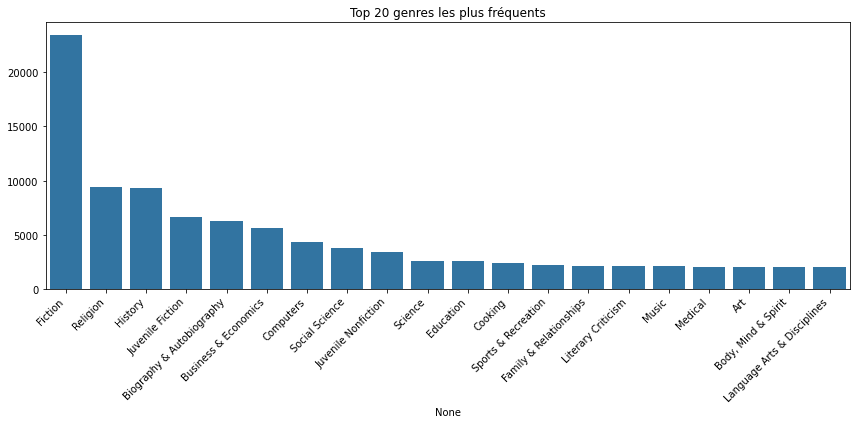

In [11]:
N = 20  # Ajuster selon vos besoins
top_genres = GenreDF['Genre'].value_counts().nlargest(N)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title(f'Top {N} genres les plus fréquents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Word Cloud Mot les plus frequents

In [12]:
# 2. Les mots les plus fréquents dans les revues ayant obtenues un score >5
# (afficher sous forme de WordCloud)


commentaire =ratingdf[ratingdf['revue/score'] ==5]['revue/texte'].values
cleaned_commentaire = [remove_stop_words(comment) for comment in commentaire]

TypeError: expected string or bytes-like object

In [ ]:
text = ' '.join(map(str, cleaned_commentaire))

In [ ]:
wordcloud = WordCloud(
    width=1600, 
    height=800,
    background_color='white',
    stopwords=set(stopwords.words('english')),
    max_words=100
).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud des Revues 5 étoiles', fontsize=20)
plt.show()

# Livres les plus commenté

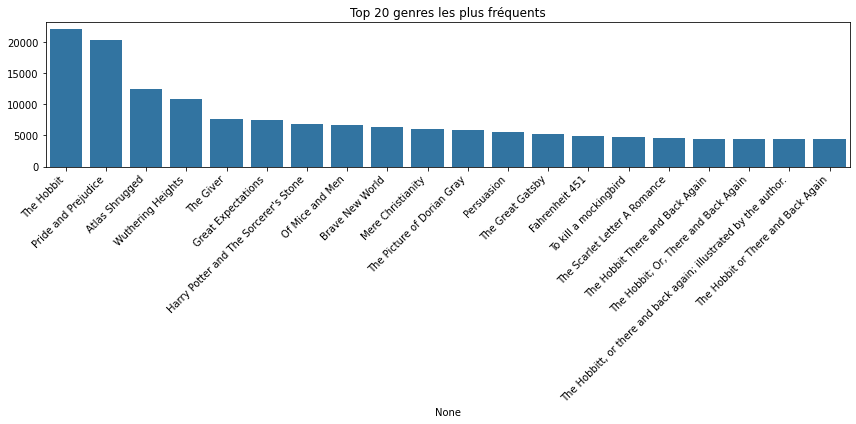

In [7]:
N = 20  # Ajuster selon vos besoins
top_genres = ratingdf['Titre'].value_counts().nlargest(N)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title(f'Top {N} genres les plus fréquents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Livres les mieux noté

In [10]:
# Calculer la moyenne de chaque colonne pour chaque genre
average_by_title = ratingdf.groupby('Titre')['revue/score'].mean().nlargest(N)

average_by_title

Titre
" We'll Always Have Paris": The Definitive Guide to Great Lines from the Movies                                                                                     5.0
"A careless word, a needless sinking": A history of the staggering losses suffered by the U.S. Merchant Marine, both in ships and personnel during World War II     5.0
"A careless word-- a needless sinking": A history of the staggering losses suffered by the U.S. Merchant Marine, both in ships and personnel during World War II    5.0
"A giant in the earth,": A biography of Dr. J. B. Boddie,                                                                                                           5.0
"A parallel", the basis of the Book of Mormon: B.H. Roberts' "Parallel" of the Book of Mormon to View of the Hebrews                                                5.0
"All in each place",: A guide to local ecumenism                                                                                                          

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# Séparation des features (X) et de la target (y)
X = merged_df.drop(columns=['revue/score'])
y = merged_df['revue/score']
le = OrdinalEncoder()
for colonne in X.select_dtypes(include=['object']).columns:
    X[[colonne]] = le.fit_transform(X[[colonne]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Aperçu des données encodées
print("Aperçu des données encodées :")
X.head()


KeyboardInterrupt: 

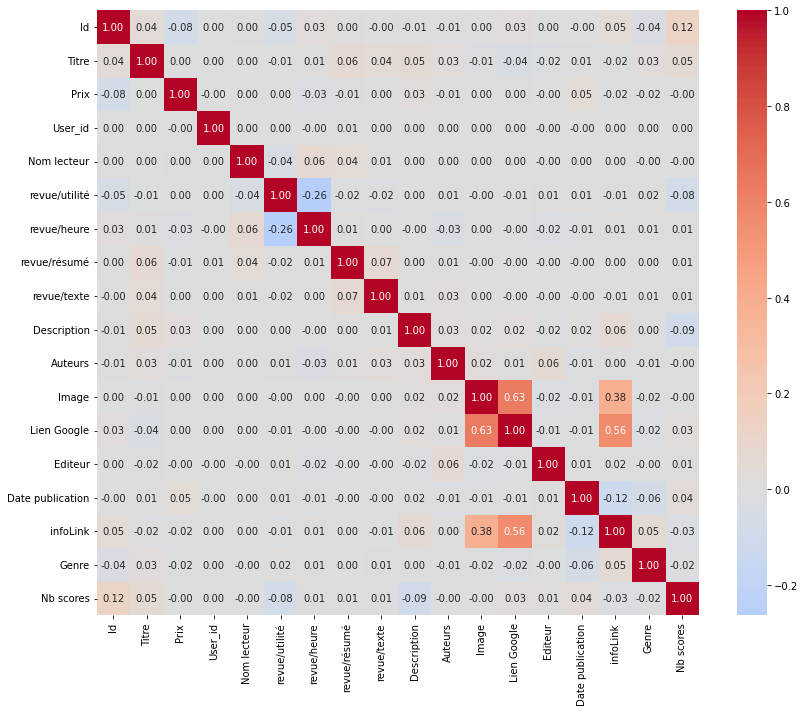

In [49]:
# 8. Existe t-il une corrélation entre l’éditeur et le commentaire (score)
# 9. Existe-t-il une corrélation entre les auteurs et le commentaire (score).

# Créer la matrice de corrélation
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_train.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,        
            cmap='coolwarm',   
            center=0,         
            fmt='.2f')   


plt.tight_layout()
plt.show()

In [50]:
merged_df.head(2)

,Id,Titre,Prix,User_id,Nom lecteur,revue/utilité,revue/score,revue/heure,revue/résumé,revue/texte,Description,Auteurs,Image,Lien Google,Editeur,Date publication,infoLink,Genre,Nb scores
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,01/01/2005,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
